In [125]:
def collectData(filename):
    import csv
    with open(filename) as f:
        idata = csv.reader(f, delimiter=';')
        data = []
        for row in idata:
            try:
                data.append([float(i) for i in row])
            except ValueError:
                pass
        #data = data[2:]
        import numpy as np
        data=np.array(data)
        return np.vstack([data[:,1:4], data[:,4:7], data[:,7:10]])

In [126]:
def clusterize(data):
    from sklearn import cluster
    
    alg = cluster.KMeans(n_clusters=3)
    alg.fit(data)
    return alg

def predict(data, alg):
    return alg.predict(data)

In [127]:
data = collectData('/Users/missoni/Documents/arbeit/Vortrag Uni Bayreuth TdM 2015/PCATrain.csv')
cla = clusterize(data)
labels = cla.labels_

In [128]:
test = collectData('/Users/missoni/Documents/arbeit/Vortrag Uni Bayreuth TdM 2015/PCATest.csv')
print test
predicted_labels = predict(test, cla)

[[ 17.148502   12.373202    9.6733799]
 [  9.148221    7.1722412   6.0426407]
 [ 13.882115    7.5724792   4.1481314]]


In [129]:
for line, label in zip(data,labels):
    print line, label

[ 16.311586   14.325955    9.8286486] 1
[ 16.665186   13.256612    9.7008724] 1
[ 15.14246    12.33314     9.6523609] 1
[ 14.808215   11.253709    9.7762594] 1
[ 15.382501   12.347138    9.6349869] 1
[ 16.217882   12.124549    9.8242865] 1
[ 10.696697    7.6565504   6.7607961] 0
[ 10.708123    7.9932237   7.0646067] 0
[ 9.1721411  6.8554573  5.3443761] 0
[ 8.5368404  6.9625692  5.4167395] 0
[ 9.4552107  6.9658623  5.6552234] 0
[ 9.0023603  6.9799147  5.645607 ] 0
[ 13.103959    6.9604783   3.1694312] 2
[ 12.250017    7.8619103   3.1901767] 2
[ 12.931976   11.626744    6.1865125] 2
[ 11.166275   10.145668    4.2146182] 2
[ 13.415077    9.723571    6.6868973] 2
[ 12.452609    8.3112831   5.2217364] 2


In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

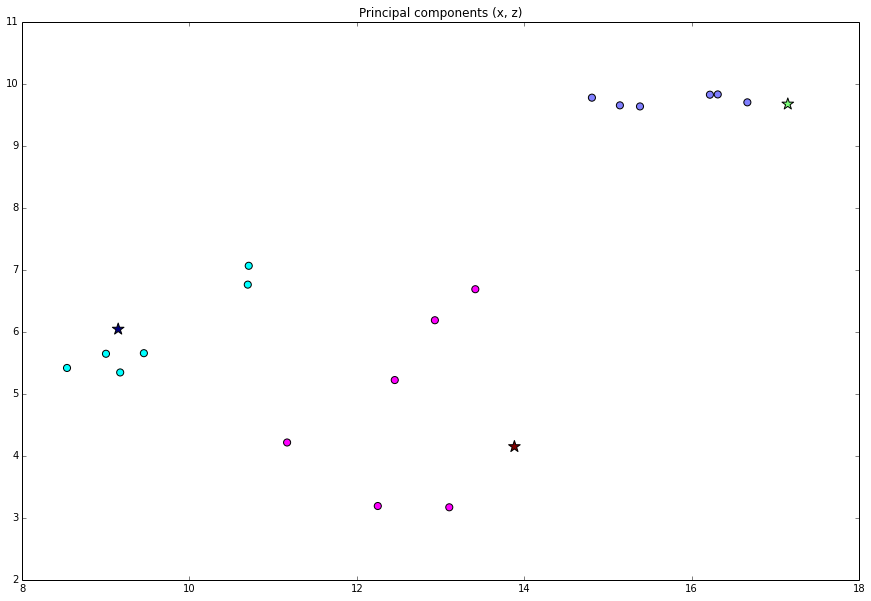

In [143]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('Principal components (x, z)')
ax.scatter(data[:,0], data[:,2], c=labels, s=50, cmap='cool')
ax.scatter(test[:,0], test[:,2], c=predicted_labels, s=150, marker='*')

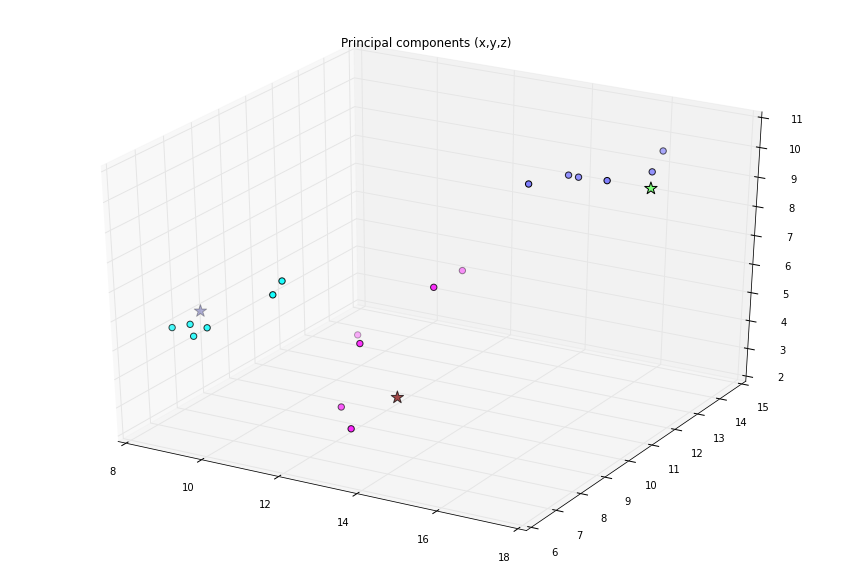

In [145]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Principal components (x,y,z)')
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, s=40, cmap='cool')
ax.scatter(test[:,0], test[:,1], test[:,2], c=predicted_labels, marker='*', s=170)